In [52]:
import tensorflow as tf
from tensorflow.keras import datasets , layers ,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

In [53]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [54]:
x_train.shape

(50000, 32, 32, 3)

In [55]:
x_test.shape

(10000, 32, 32, 3)

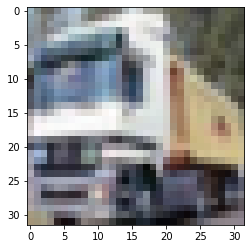

In [56]:
plt.imshow(x_train[1])

In [57]:
classes = [ "airplane" , "automobile" ,"bird", "cat", "deer", "dog" ,"frog" ,"horse" ,"ship" ,"truck"]

In [58]:
 y_train.shape

(50000, 1)

In [59]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [60]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [61]:
classes[9]

'truck'

In [62]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

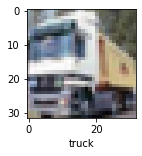

In [63]:
plot_sample(x_train,y_train,1)

In [64]:
x_train =x_train/255
x_test = x_test/255


In [65]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [66]:
model = keras.Sequential(
    [
     layers.Conv2D(filters=64,kernel_size=(3,3), activation ='relu' ,input_shape=(32,32,3)),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3), activation ='relu'),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3), activation ='relu'),
     layers.MaxPool2D((2,2)),
     keras.layers.Flatten(),
     keras.layers.Dense(32,activation ="relu"),
     keras.layers.Dense(10 ,activation ="softmax"),
     
    ]
)

model.compile(optimizer = "RMSprop",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7407 - accuracy: 0.3672
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3656 - accuracy: 0.5106
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2082 - accuracy: 0.5729
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1102 - accuracy: 0.6084
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0403 - accuracy: 0.6350


In [67]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report: \n" , classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.77      0.58      0.66      1000
           1       0.80      0.75      0.77      1000
           2       0.47      0.55      0.51      1000
           3       0.41      0.51      0.46      1000
           4       0.62      0.51      0.56      1000
           5       0.53      0.52      0.52      1000
           6       0.53      0.86      0.65      1000
           7       0.82      0.56      0.67      1000
           8       0.82      0.69      0.75      1000
           9       0.76      0.72      0.74      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000



In [68]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0780 - accuracy: 0.6252


[1.078021764755249, 0.6251999735832214]

In [69]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9886 - accuracy: 0.6568
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9486 - accuracy: 0.6679
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9138 - accuracy: 0.6842
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8831 - accuracy: 0.6933
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8622 - accuracy: 0.7008
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8370 - accuracy: 0.7104
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8192 - accuracy: 0.7155
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7989 - accuracy: 0.7224
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7874 - accuracy: 0.7267
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.772

In [79]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6522 - accuracy: 0.6048


[1.6521679162979126, 0.6047999858856201]

In [80]:
model.fit(x_train,y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6922 - accuracy: 0.7788
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7136 - accuracy: 0.7787
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7194 - accuracy: 0.7776
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6802 - accuracy: 0.7822
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6727 - accuracy: 0.7791
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6852 - accuracy: 0.7790
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6765 - accuracy: 0.7800
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6906 - accuracy: 0.7772
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6792 - accuracy: 0.7799
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.705

In [81]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2335 - accuracy: 0.6575


[1.2334799766540527, 0.6575000286102295]

In [82]:
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6748 - accuracy: 0.7815
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6963 - accuracy: 0.7745
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7229 - accuracy: 0.7754
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7132 - accuracy: 0.7728
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7085 - accuracy: 0.7763
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6867 - accuracy: 0.7762
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6876 - accuracy: 0.7800
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6890 - accuracy: 0.7763
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7144 - accuracy: 0.7724
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.702

In [83]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3385 - accuracy: 0.6701


[1.3384828567504883, 0.6700999736785889]

In [84]:
model.fit(x_train,y_train, epochs=70)

Epoch 1/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7332 - accuracy: 0.7706
Epoch 2/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7222 - accuracy: 0.7669
Epoch 3/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7149 - accuracy: 0.7694
Epoch 4/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7356 - accuracy: 0.7656
Epoch 5/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7291 - accuracy: 0.7660
Epoch 6/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7347 - accuracy: 0.7670
Epoch 7/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7213 - accuracy: 0.7689
Epoch 8/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7537 - accuracy: 0.7668
Epoch 9/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7233 - accuracy: 0.7665
Epoch 10/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.723

In [85]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4537 - accuracy: 0.6455


[1.4536737203598022, 0.6455000042915344]

In [86]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7147 - accuracy: 0.7680
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7259 - accuracy: 0.7699
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7212 - accuracy: 0.7690
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7990 - accuracy: 0.7694
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7884 - accuracy: 0.7665
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7115 - accuracy: 0.7706
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7086 - accuracy: 0.7674
Epoch 8/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7240 - accuracy: 0.7718
Epoch 9/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7399 - accuracy: 0.7710
Epoch 10/100
1563/1563 [==============================] - 7s 4ms/step - l

In [87]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7876 - accuracy: 0.6364


[1.7875587940216064, 0.6363999843597412]